In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('input_ginis.csv', skiprows=1,
                 names=['ISO3', 'year'] + ['SSP{}'.format(i) for i in range(1, 5)])

In [3]:
df.head()

,ISO3,year,SSP1,SSP2,SSP3,SSP4
0,AUT,2011,26.074261,26.069490,26.068783,26.066082
1,AUT,2012,26.737581,26.804142,26.882103,26.910206
2,AUT,2013,26.663391,26.807251,26.972239,27.031157
3,AUT,2014,26.715080,26.942604,27.202990,27.292898
4,AUT,2015,26.758348,27.075573,27.439514,27.560543


# Values below Threshold

## Single Example

set(['BEL', 'LUX', 'DEU', 'LKA', 'BOL', 'CRI', 'HUN', 'ECU', 'PRT', 'POL', 'NLD', 'FRA', 'EST', 'LTU', 'ESP', 'GTM', 'DNK', 'BLR', 'CHN', 'MLT', 'FIN', 'THA', 'PHL', 'CZE', 'MEX', 'AUT'])


/home/gidden/.local/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


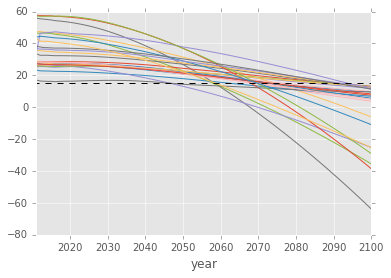

In [4]:
isos = set(df[(df['SSP1'] < 15)]['ISO3'])
print(isos)
fig, ax = plt.subplots()
df.set_index(['ISO3', 'year']).sort_index().loc[list(isos)]['SSP1'].unstack(level=0).plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

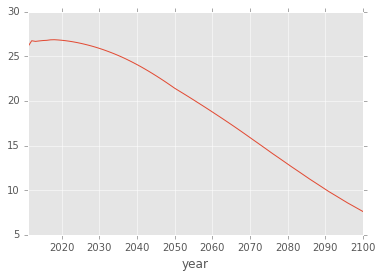

In [5]:
data = df.set_index(['ISO3', 'year']).loc['AUT']['SSP1']
data.plot()

In [6]:
cross_idx = np.where(data < 15)[0][0]
cross_idx

63

In [7]:
def coeffs(x, y, i, l=15, dx=5):
    df_i = (y[i + dx] - y[i - dx]) / (x[i + dx] - x[i - dx])
    b = -df_i / (y[i] - l)
    a = (y[i] - l) * np.exp(b * x[i])
    return a, b

In [8]:
x = data.index.values
y = data.values
l = 15
i = cross_idx - 20
a, b = coeffs(x, y, i, l=l)
print(a, b)
f = lambda _: a * np.exp(-b * _) + l

(1.0635547547450885e+45, 0.049656741982872926)


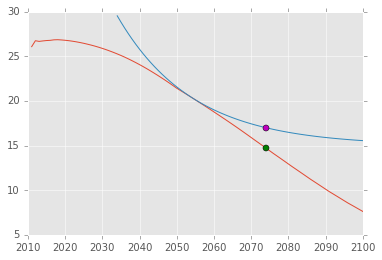

In [9]:
plt.plot(x, y, x[i - 20:], f(x[i - 20:]), x[cross_idx], y[cross_idx], 'go', x[cross_idx], f(x[cross_idx]), 'mo')

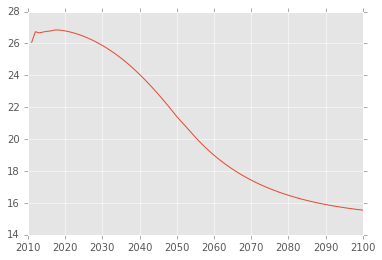

In [10]:
newy = np.append(y[:i], f(x)[i:])
plt.plot(x, newy)

## Apply to all

In [11]:
df.set_index(['ISO3', 'year']).head()

SSP1       SSP2       SSP3       SSP4
ISO3 year                                            
AUT  2011  26.074261  26.069490  26.068783  26.066082
     2012  26.737581  26.804142  26.882103  26.910206
     2013  26.663391  26.807251  26.972239  27.031157
     2014  26.715080  26.942604  27.202990  27.292898
     2015  26.758348  27.075573  27.439514  27.560543

In [12]:
df2 = df.pivot('ISO3', 'year')
df2.head()

SSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663391  26.715080  26.758348  26.782524   
BEL   28.349951  27.892923  27.666281  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726009   
BLR   25.279303  25.569714  25.520451  25.355467  25.220890  25.115076   
BOL   55.876625  55.509068  55.266956  55.004005  54.729530  54.316517   

                                                    ...           SSP4  \
year       2017       2018       2019       2020    ...           2091   
ISO3                                                ...                  
AUT   26.837685  26.851339  26.824463  26.787796    ...      48.966751   
BEL   27.265703  27.214397  27.118797  27.014381    ...      47.504608   
BGR   35.867489  36.125523  36.346970  36.556721    ...      72.265343   
BLR   25.215233  25.340946  25.435713  25.522364    ...      62.577930   
BOL   54.118164  53.882065  53.587025  53.252861    ...      28.336195   

                                                                        \
year       2092       2093       2094       2095       2096       2097   
ISO3                                                                     
AUT   49.297230  49.628582  49.960857  50.294060  50.627499  50.957699   
BEL   47.789795  48.075272  48.361053  48.647160  48.932987  49.214417   
BGR   72.740921  73.219604  73.701454  74.186531  74.674492  75.165504   
BLR   63.084515  63.594028  64.106522  64.622025  65.138771  65.656494   
BOL   27.443846  26.534595  25.608240  24.664602  23.704590  22.727461   

                                       
year       2098       2099       2100  
ISO3                                   
AUT   51.288811  51.620872  51.953903  
BEL   49.496109  49.778107  50.060425  
BGR   75.659904  76.157776  76.659164  
BLR   66.177322  66.701271  67.228409  
BOL   21.732489  20.719433  19.688087  

[5 rows x 360 columns]

In [13]:
df2['SSP1'].head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
ISO3,,,,,,,,,,,,,,,,,,,,,
AUT,26.074261,26.737581,26.663391,26.715080,26.758348,26.782524,26.837685,26.851339,26.824463,26.787796,...,9.838898,9.586396,9.332332,9.076777,8.819676,8.565182,8.330998,8.095411,7.858410,7.620029
BEL,28.349951,27.892923,27.666281,27.669338,27.500769,27.337940,27.265703,27.214397,27.118797,27.014381,...,11.217318,11.033590,10.848681,10.662646,10.475468,10.288374,10.109928,9.930381,9.749751,9.568041
BGR,36.120251,35.952427,35.914841,35.817028,35.779800,35.726009,35.867489,36.125523,36.346970,36.556721,...,29.873932,29.781660,29.689251,29.596771,29.504185,29.415249,29.338371,29.261564,29.184816,29.108177
BLR,25.279303,25.569714,25.520451,25.355467,25.220890,25.115076,25.215233,25.340946,25.435713,25.522364,...,13.656447,13.460012,13.261841,13.061974,12.860375,12.664995,12.482435,12.298376,12.112794,11.925723
BOL,55.876625,55.509068,55.266956,55.004005,54.729530,54.316517,54.118164,53.882065,53.587025,53.252861,...,-44.103882,-46.208118,-48.334270,-50.482395,-52.652706,-54.827118,-57.014435,-59.223530,-61.454586,-63.707714


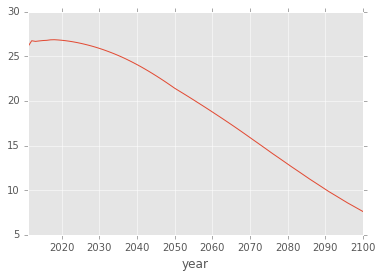

In [14]:
df2['SSP1'].loc['AUT'].plot()

In [98]:
def dy_dx(x, y, i, dx=5):
    return (y[i + dx] - y[i - dx]) / (x[i + dx] - x[i - dx])

def adj_below(data):
    l = 15
    if (data > l).all():
        return data
    
    cross_idx = np.where(data < l)[0][0]
    x = data.index.values
    y = data.values
    i = cross_idx - 20 if dy_dx(x, y, cross_idx - 20) < 0  and cross_idx - 20 > 0 else cross_idx - 10
    assert(dy_dx(x, y, i) < 0) # must be 0
    a, b = coeffs(x, y, i, l=l)
    
    f = lambda _: a * np.exp(-b * _) + l
    return np.append(y[:i], f(x)[i:])

In [54]:
df3 = df2.copy()
df3['SSP1'].loc['AUT'] = adj_below(df3['SSP1'].loc['AUT'])

/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


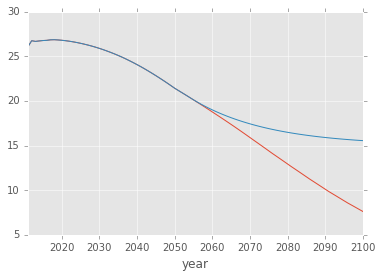

In [55]:
fig, ax = plt.subplots()
df2['SSP1'].loc['AUT'].plot(ax=ax)
df3['SSP1'].loc['AUT'].plot(ax=ax)

In [56]:
df4 = df2.copy()
for ssp in ['SSP{}'.format(i) for i in range(1, 2)]:
    print(ssp)
    for iso, row in df4[ssp].iterrows():
        df4[ssp].loc[iso] = adj_below(df4[ssp].loc[iso])

SSP1


/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
df4.head()

SSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663391  26.715080  26.758348  26.782524   
BEL   28.349951  27.892923  27.666281  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726009   
BLR   25.279303  25.569714  25.520451  25.355467  25.220890  25.115076   
BOL   55.876625  55.509068  55.266956  55.004005  54.729530  54.316517   

                                                    ...           SSP4  \
year       2017       2018       2019       2020    ...           2091   
ISO3                                                ...                  
AUT   26.837685  26.851339  26.824463  26.787796    ...      48.966751   
BEL   27.265703  27.214397  27.118797  27.014381    ...      47.504608   
BGR   35.867489  36.125523  36.346970  36.556721    ...      72.265343   
BLR   25.215233  25.340946  25.435713  25.522364    ...      62.577930   
BOL   54.118164  53.882065  53.587025  53.252861    ...      28.336195   

                                                                        \
year       2092       2093       2094       2095       2096       2097   
ISO3                                                                     
AUT   49.297230  49.628582  49.960857  50.294060  50.627499  50.957699   
BEL   47.789795  48.075272  48.361053  48.647160  48.932987  49.214417   
BGR   72.740921  73.219604  73.701454  74.186531  74.674492  75.165504   
BLR   63.084515  63.594028  64.106522  64.622025  65.138771  65.656494   
BOL   27.443846  26.534595  25.608240  24.664602  23.704590  22.727461   

                                       
year       2098       2099       2100  
ISO3                                   
AUT   51.288811  51.620872  51.953903  
BEL   49.496109  49.778107  50.060425  
BGR   75.659904  76.157776  76.659164  
BLR   66.177322  66.701271  67.228409  
BOL   21.732489  20.719433  19.688087  

[5 rows x 360 columns]

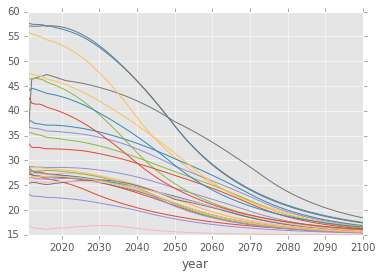

In [58]:
fig, ax = plt.subplots()
df4.loc[list(isos)]['SSP1'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

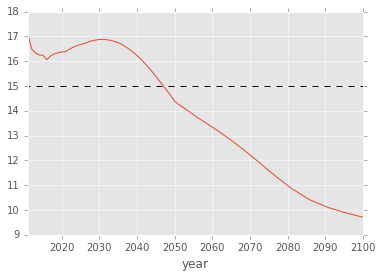

In [60]:
# LTU is special here, because it goes up at cross_idx - 20
fig, ax = plt.subplots()
df2.loc['LTU']['SSP1'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

# Values above Threshold

set(['SVK', 'USA', 'DOM', 'CHL', 'GTM', 'PER', 'BLR', 'BGR', 'JAM', 'CAN', 'IND', 'LKA', 'COL', 'BRA'])


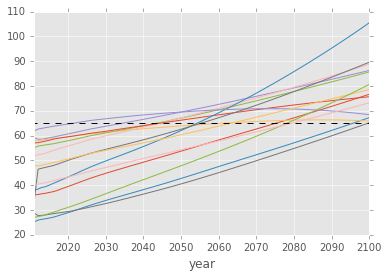

In [63]:
isos = set(df[(df['SSP4'] > 65)]['ISO3'])
print(isos)
fig, ax = plt.subplots()
df.set_index(['ISO3', 'year']).sort_index().loc[list(isos)]['SSP4'].unstack(level=0).plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [65] * 1000, 'k--')

In [91]:
def adj_above(data):
    l = 65
    if (data < l).all():
        return data
    
    cross_idx = np.where(data > l)[0][0]
    x = data.index.values
    y = data.values
    i = cross_idx - 20 if dy_dx(x, y, cross_idx - 20) > 0 and cross_idx - 20 > 0 else cross_idx - 10
    assert(dy_dx(x, y, i) > 0) # must be 0
    a, b = coeffs(x, y, i, l=l)
    
    f = lambda _: a * np.exp(-b * _) + l
    return np.append(y[:i], f(x)[i:])

## Just for One

/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


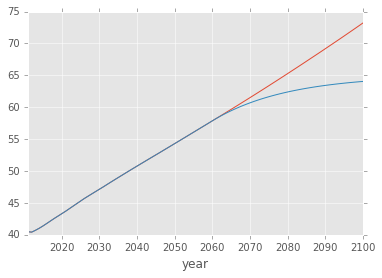

In [92]:
df3['SSP4'].loc['USA'] = adj_above(df3['SSP4'].loc['USA'])
fig, ax = plt.subplots()
df2['SSP4'].loc['USA'].plot(ax=ax)
df3['SSP4'].loc['USA'].plot(ax=ax)

## Now for All

In [93]:
for ssp in ['SSP{}'.format(i) for i in range(3, 4)]:
    print(ssp)
    for iso, row in df4[ssp].iterrows():
        df4[ssp].loc[iso] = adj_above(df4[ssp].loc[iso])

SSP3


/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


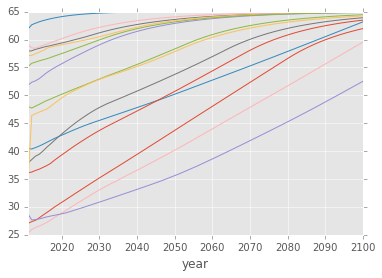

In [94]:
fig, ax = plt.subplots()
df4.loc[list(isos)]['SSP3'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [65] * 1000, 'k--')

# Do all Adjustments and Save

In [95]:
df5 = df2.copy()

for ssp in ['SSP{}'.format(i) for i in range(1, 5)]:
    print(ssp)
    for iso, row in df5[ssp].iterrows():
        df5[ssp].loc[iso] = adj_below(df5[ssp].loc[iso])
        df5[ssp].loc[iso] = adj_above(df5[ssp].loc[iso])

SSP1


/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SSP2
SSP3
SSP4


In [96]:
df5.head()

SSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663391  26.715080  26.758348  26.782524   
BEL   28.349951  27.892923  27.666281  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726009   
BLR   25.279303  25.569714  25.520451  25.355467  25.220890  25.115076   
BOL   55.876625  55.509068  55.266956  55.004005  54.729530  54.316517   

                                                    ...           SSP4  \
year       2017       2018       2019       2020    ...           2091   
ISO3                                                ...                  
AUT   26.837685  26.851339  26.824463  26.787796    ...      48.966751   
BEL   27.265703  27.214397  27.118797  27.014381    ...      47.504608   
BGR   35.867489  36.125523  36.346970  36.556721    ...      63.634915   
BLR   25.215233  25.340946  25.435713  25.522364    ...      60.264006   
BOL   54.118164  53.882065  53.587025  53.252861    ...      28.336195   

                                                                        \
year       2092       2093       2094       2095       2096       2097   
ISO3                                                                     
AUT   49.297230  49.628582  49.960857  50.294060  50.627499  50.957699   
BEL   47.789795  48.075272  48.361053  48.647160  48.932987  49.214417   
BGR   63.704697  63.770912  63.833741  63.893359  63.949930  64.003608   
BLR   60.490049  60.705303  60.910284  61.105481  61.291361  61.468370   
BOL   27.443846  26.534595  25.608240  24.664602  23.704590  22.727461   

                                       
year       2098       2099       2100  
ISO3                                   
AUT   51.288811  51.620872  51.953903  
BEL   49.496109  49.778107  50.060425  
BGR   64.054543  64.102873  64.148733  
BLR   61.636930  61.797445  61.950299  
BOL   21.732489  20.719433  19.688087  

[5 rows x 360 columns]

In [97]:
assert((df5 <= 65).all(axis=0).all())
assert((df5 >= 15).all(axis=0).all())

In [99]:
df5.to_csv('adjusted.csv')